#INSTALAÇÃO E IMPORTAÇÃO DAS BIBLIOTECAS UTILIZADAS

In [ ]:
pip install mysql-connector-python

In [ ]:
pip install xlrd

In [ ]:
pip install --upgrade xlrd

In [ ]:
pip install pyspark

In [ ]:
pip install gcsfs

In [ ]:
pip install pymongo[srv]

In [ ]:
#Importação das principais bibliotecas utilizadas
from pyspark.sql import SparkSession
from pyspark import SparkConf
import pyspark.sql.functions as F
from pyspark.sql.functions import col
from pyspark.sql.functions import round
import mysql.connector
from sqlalchemy import create_engine
import pymongo
from pymongo import MongoClient

In [ ]:
import pandas as pd
from google.cloud import storage
import os
import xlrd
import matplotlib.pyplot as plt
import numpy as np
#CRIAÇÃO DA STRUCT PARA FIXAR O ESQUEMA PARA A UTILIZAÇÃO DO PYSPARK
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType


# CONEXÃO COM O GCP

In [ ]:
#Serviço de autenticação via chave JSON.
serviceAccount='/content/bc12-estilo-de-vida-proj-final-ce1a0518f51e.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS']=serviceAccount
client=storage.Client()
bucket=client.get_bucket('bucket-estilo-vida')

#Conexão MongoDB

In [ ]:
#Criando a conexão com o MongoDB
client = pymongo.MongoClient("")

#SPARK

In [ ]:
# DEFININDO O ESQUEMA PARA O DF
esquema = (
	StructType([
	StructField("ano",IntegerType(), True),
	StructField("uf", StringType(), True),
	StructField("municipio", StringType(), True),
	StructField("renda_media", FloatType(), True),
	StructField("tx_ativ_10_anos", FloatType(), True),
  StructField("tx_ativ_10-14_anos", FloatType(), True),
  StructField("tx_desocup_10_anos", FloatType(), True),
	StructField("tx_desocup_adultos", FloatType(), True),
	StructField("idhm_longevidade", FloatType(), True),
  StructField("idhm_renda", FloatType(), True),
  StructField("idhm_educacao", FloatType(), True),
  StructField("escol_fund_adulta", FloatType(), True),
  StructField("idhm", FloatType(), True),
  StructField("perc_ocup_18_anos", FloatType(), True),
  StructField("pop_rural", IntegerType(), True),
  StructField("pop_total", IntegerType(), True),
  StructField("pop_urb", IntegerType(), True)
	])
)

In [ ]:
# SparkSession

spark = ( 
    SparkSession.builder
          .master('local')
          .appName('projeto-final')
          .config('spark.ui.port','4050')
          .config("spark.jars", 'https://storage.googleapis.com/hadoop-lib/gcs/gcs-connector-hadoop2-latest.jar')          
          .getOrCreate()
)

In [ ]:
# IMPORTANDO O DF PARA O PySpark

path = 'gs://bucket-estilo-vida/dados_tratados/Tratados_pandas/df.csv'

dfs = (
    spark.read.format('csv')
    .option('delimiter',',')
    .option('header','true')
    .option('inferschema','true')
    .load(path)

)

In [ ]:
dfs.show()

+----+---+--------------------+-----------+---------------+------------------+------------------+------------------+----------------+----------+-------------+-----------------+-----+-----------------+---------+---------+-------+
| ano| uf|           municipio|renda_media|tx_ativ_10_anos|tx_ativ_10-14_anos|tx_desocup_10_anos|tx_desocup_adultos|idhm_longevidade|idhm_renda|idhm_educacao|escol_fund_adulta| idhm|perc_ocup_18_anos|pop_rural|pop_total|pop_urb|
+----+---+--------------------+-----------+---------------+------------------+------------------+------------------+----------------+----------+-------------+-----------------+-----+-----------------+---------+---------+-------+
|1991| RO|ALTA FLORESTA D'O...|     198.46|           null|              null|              null|              null|           0.617|     0.516|        0.112|            0.117|0.329|             null|    14167|    23546|   9379|
|1991| RO|           ARIQUEMES|     319.47|           null|              null|      

In [ ]:
# DEFININDO O SCHEMA PARA O DFF

schema = (
    StructType([
        StructField("Country Name",StringType(), True),
        StructField("Indicator Name" ,StringType(), True),
        StructField("1991", FloatType(), True),
        StructField("1992", FloatType(), True),
        StructField("1993", FloatType(), True),
        StructField("1994", FloatType(), True),
        StructField("1995", FloatType(), True),
        StructField("1996", FloatType(), True),
        StructField("1997", FloatType(), True),
        StructField("1998", FloatType(), True),
        StructField("1999", FloatType(), True),
        StructField("2000" , FloatType(), True),
        StructField("2001" , FloatType(), True),
        StructField("2002" , FloatType(), True),
        StructField("2003" , FloatType(), True),
        StructField("2004" , FloatType(), True),
        StructField("2005" , FloatType(), True),
        StructField("2006" , FloatType(), True),
        StructField("2007" , FloatType(), True),
        StructField("2008" , FloatType(), True),
        StructField("2009" , FloatType(), True),
        StructField("2010", FloatType(), True),
        StructField("2011", FloatType(), True),
        StructField("2012", FloatType(), True),
        StructField("2013", FloatType(), True),
        StructField("2014", FloatType(), True),
        StructField("2015", FloatType(), True),
        StructField("2016", FloatType(), True),
        StructField("2017", FloatType(), True),
        StructField("2018", FloatType(), True),
        StructField("2019", FloatType(), True),
        StructField("2020", FloatType(), True)
            ]))


In [ ]:
# IMPORTANDO O DFF PARA O PySpark

path = 'gs://bucket-estilo-vida/dados_tratados/Tratados_pandas/dff.csv'

dffspark = (
    spark.read.format('csv')
    .option('delimiter',',')
    .option('header','true')
    .option('inferschema','true')
    .load(path)

)

In [ ]:
#Dropando coluna "Country Name", pois todos os dados são do Brasil
dffspark = dffspark.drop(F.col("Country Name"))

In [ ]:
#Dropando coluna "Country Name", pois todos os dados são do Brasil
dffspark = dffspark.drop(F.col("Country Code"))

In [ ]:
#Dropando coluna "Indicator Code" pois a mesma se refere a sigla em inglês da coluna "Indicator Name" sendo desta forma apenas um repetição da informação
dffspark = dffspark.drop(F.col("Indicator Code"))

In [ ]:
#Renomeando a coluna Indicator Name
dffspark = dffspark.withColumnRenamed('Indicator Name','indicador')

In [ ]:
dffspark.show(50,truncate=False)

+---------------------------------------------------------------------------------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|indicador                                                                                    |1991                 |1992                 |1993                 |1994                 |1995                 |1996                 |1997              

In [ ]:
#TRANSPONDO AS LINHAS E COLUNAS DO DATAFRAME DFFSPARK UTILIZANDO O PANDAS E RECONVERTENDO PARA O PYSPARK
dffspark = dffspark.toPandas()

In [ ]:
dffspark = dffspark.set_index('indicador')

In [ ]:
dffspark = dffspark.T

In [ ]:
dffspark['ano'] = dffspark.index

In [ ]:
dffspark

indicador,Exportações de alta tecnologia (% de exportações manufaturadas),Índice de termos de permuta líquida (2000 = 100),Comércio de mercadorias (% do PIB),"População, total",Crescimento da população (anual %),"Taxa de fertilidade, total (nascimentos por mulher)","Expectativa de vida no nascimento, total (anos)",Taxa de mortalidade infantil (por 1.000 nascidos vivos):,Uso de método anticoncepcional (% de mulheres de 15 a 19 anos de idade),Taxa de fertilidade de adolescentes (nascimentos por 1.000 mulheres de 15 a 19 anos de idade),...,"Serviço da dívida total (% de exportações de produtos, serviços e renda primária)","Assistência oficial para o desenvolvimento (US$ atual, líquido)","Ações da dívida externa, total (DOD, US$ atual)",Capitalização de mercado de empresas listadas (% do PIB),"Remessas pessoais, recebidas (US$ atual)","Investimento estrangeiro direto, ingressos líquidos (BoP, US$ atual)",Superfície (km²),Área florestal (km²),Terra cultivável (% de área terrestre),ano
1991,NaN,78.906250,15.926892,151648007.0,1.759414,2.822,66.742,50.6,59.2,83.3338,...,23.425089,1.961400e+08,1.213367e+11,NaN,1.110000e+09,1.103000e+09,8515770.0,5851170.6,27.934469,1991
1992,NaN,81.967213,17.949776,154259382.0,1.707339,2.754,67.141,48.4,NaN,83.7270,...,21.240737,-2.355900e+08,1.295359e+11,NaN,1.791000e+09,2.061000e+09,8515770.0,5813361.2,27.764598,1992
1993,NaN,87.272727,17.963551,156849086.0,1.664862,2.693,67.539,46.0,NaN,83.8340,...,25.158259,1.975200e+08,1.445996e+11,NaN,1.247000e+09,1.292000e+09,8515770.0,5775551.8,27.594728,1993
1994,NaN,100.952381,15.177308,159432717.0,1.633789,2.639,67.932,43.5,NaN,83.9410,...,31.241839,2.598700e+08,1.529031e+11,NaN,2.068000e+09,3.072000e+09,8515770.0,5737742.4,27.424858,1994
1995,NaN,110.377358,13.081846,162019889.0,1.609710,2.588,68.318,41.1,NaN,84.0480,...,38.565682,2.643300e+08,1.609642e+11,NaN,2.952000e+09,4.859000e+09,8515770.0,5699933.0,27.255466,1995
1996,NaN,108.333333,12.314763,164614682.0,1.588838,2.536,68.695,38.7,76.7,84.1550,...,43.694779,2.578000e+08,1.817935e+11,NaN,2.059000e+09,1.255200e+10,8515770.0,5662123.6,27.267873,1996
1997,NaN,114.423077,13.273907,167209046.0,1.563732,2.483,69.061,36.5,NaN,84.2620,...,59.846535,2.297900e+08,1.989803e+11,NaN,1.572000e+09,1.899293e+10,8515770.0,5624314.2,27.280280,1997
1998,NaN,114.285714,12.943218,169785253.0,1.528962,2.426,69.419,34.3,NaN,83.5780,...,80.755916,2.606100e+08,2.419984e+11,NaN,1.236000e+09,2.885561e+10,8515770.0,5586504.8,27.292687,1998
1999,NaN,103.157895,16.639926,172318674.0,1.481110,2.365,69.769,32.3,NaN,82.8940,...,116.563894,1.443800e+08,2.451150e+11,NaN,1.501000e+09,2.838568e+10,8515770.0,5548695.4,27.305094,1999
2000,NaN,100.000000,17.356368,174790339.0,1.424167,2.300,70.116,30.4,NaN,82.2100,...,87.004623,2.556800e+08,2.425117e+11,34.503461,1.349591e+09,3.299472e+10,8515770.0,5510886.0,27.317501,2000


In [ ]:
dffspark = spark.createDataFrame(data=dffspark)

In [ ]:
dffspark.columns

['Exportações de alta tecnologia (% de exportações manufaturadas)',
 'Índice de termos de permuta líquida (2000 = 100)',
 'Comércio de mercadorias (% do PIB)',
 'População, total',
 'Crescimento da população (anual %)',
 'Taxa de fertilidade, total (nascimentos por mulher)',
 'Expectativa de vida no nascimento, total (anos)',
 'Taxa de mortalidade infantil (por 1.000 nascidos vivos):',
 'Uso de método anticoncepcional (% de mulheres de 15 a 19 anos de idade)',
 'Taxa de fertilidade de adolescentes (nascimentos por 1.000 mulheres de 15 a 19 anos de idade)',
 'Migração, total líquido',
 'Desemprego, total (% da força de trabalho total)',
 'Pobreza, linha de pobreza nacional (% da população)',
 'Índice de Gini',
 'Pobreza, US$1,90/dia (PPP) (% da população)',
 'Participação da renda dos 20% mais pobres',
 'Prevalência da desnutrição, peso para a idade (% de crianças menores de 5 anos):',
 'Partos assistidos por pessoal de saúde qualificado (% do total):',
 'Imunização, sarampo (% de crian

In [ ]:
dffspark.show()

+---------------------------------------------------------------+------------------------------------------------+----------------------------------+----------------+----------------------------------+---------------------------------------------------+-----------------------------------------------+--------------------------------------------------------+-----------------------------------------------------------------------+---------------------------------------------------------------------------------------------+-----------------------+------------------------------------------------+---------------------------------------------------+--------------+-------------------------------------------+-----------------------------------------+--------------------------------------------------------------------------------+----------------------------------------------------------------+----------------------------------------------------+---------------------------------------------------

In [ ]:
#RENOMEANDO AS COLUNAS DO DFFSpark
dffspark = (dffspark.withColumnRenamed('Despesas militares (% do PIB)','desp_mili_%_pib')\
                    .withColumnRenamed('Assinatura de telefone celular (por 1.000 pessoas)','ass_cel_1000_pessoas')\
                    .withColumnRenamed('Tempo necessário para iniciar um negócio (dias)','temp_necess_inic_neg_dias')\
                    .withColumnRenamed('Índice da facilidade de fazer negócios (1 = regulamentações mais favoráveis ao usuário)','ind_fac_faz_neg_regulam_favora_usu')\
                    .withColumnRenamed('Receita, excluindo subsídios (% do PIB)','rec_excl_subsi_%_pib')\
                    .withColumnRenamed('Dívida do governo central, total (% do PIB)','div_gov_cent_tot_%_pib')\
                    .withColumnRenamed('Despesa com pesquisas e desenvolvimento (% do PIB)','desp_pesq_dese_%_pib')\
                    .withColumnRenamed('Inflação, preços ao consumidor (% anual)','infl_precos_cons_%_anual')\
                    .withColumnRenamed('Retiradas anuais de água doce, total (% de recursos internos)','retir_anua_agua_doc_tot_%_rec_int')\
                    .withColumnRenamed('Emissões de CO2 (toneladas métricas per capita)','emiss_de_co2_ton_met_per_cap')\
                    .withColumnRenamed('Uso de energia (kg do petróleo equivalente per capita)','uso_energ_kg_pet_equiv_per_')\
                    .withColumnRenamed('Consumo de energia elétrica (kWh per capita)','cons_ener_elet_per_capita')\
                    .withColumnRenamed('Serviço da dívida total (% de exportações de produtos, serviços e renda primária)','serv_da_div_tot_%_exp_pro_serv_renda_prim')
                    .withColumnRenamed('Assistência oficial para o desenvolvimento  (US$ atual, líquido)','assis_of_des_US$_at_liq')\
                    .withColumnRenamed('Ações da dívida externa, total (DOD, US$ atual)','acoes_da_div_ext_tot_dod_US$_atual')\
                    .withColumnRenamed('Capitalização de mercado de empresas listadas (% do PIB)','cap_de_merc_emp_list_%_pib')\
                    .withColumnRenamed('Remessas pessoais, recebidas (US$ atual)','remess_pess_receb_US$_atual')\
                    .withColumnRenamed('Investimento estrangeiro direto, ingressos líquidos (BoP, US$ atual)','invest_estra_dir_ingr_liq_bop_US$_atual')\
                    .withColumnRenamed('Superfície (km²)','superfice')\
                    .withColumnRenamed('Área florestal (km²)','area_flor_km')\
                    .withColumnRenamed('Terra cultivável (% de área terrestre)','terra_cult_%_area_terr')\
                    .withColumnRenamed('Despesa pública na educação, total (% do PIB)','despesa_publica_educacao_%_PIB')\
                    .withColumnRenamed('Matrícula escolar, ensino médio (% bruto)','matricula_ens_medio_%_bruto')\
                    .withColumnRenamed('Taxa de Matrícula Líquida Ajustada','tx_matricula_liquida')\
                    .withColumnRenamed('Matrícula escolar, ensino fundamental (% bruto)','matricula_ens_fundamental_%_bruto')\
                    .withColumnRenamed('Taxa de conclusão do ensino fundamental, total (% de faixa etária relevante)','tx_conclusao_ens_fundamental')\
                    .withColumnRenamed('Proporção meninas/meninos nos ensinos fundamental e médio (%)','proporcao_meninas_meninos_ens_fundamental_medio_%')\
                    .withColumnRenamed('Taxa de alfabetização, total de adultos (% de pessoas com 15 anos ou mais)','tx_alfabetizacao_adultos')\
                    .withColumnRenamed('RNB per capita, PPP ($ internacional atual)','rnb_per_capita')\
                    .withColumnRenamed('RNB per capita, método Atlas (US$ atual)','rnb_per_capita_atlas')\
                    .withColumnRenamed('RNB, PPP ($ internacional atual)','rnb_PPP')\
                    .withColumnRenamed('RNB, método Atlas (US$ atual)','rnb_metodo_atlas')\
                    .withColumnRenamed('PIB per capita, PPP ($ internacional atual)','pib_per_capita_PPP')\
                    .withColumnRenamed('PIB per capita (US$ atual)','pib_per_capita')\
                    .withColumnRenamed('Aumento do PIB (% anual)','aumento_pib_%')\
                    .withColumnRenamed('PIB, (US$ atual)','pib_dolar_atual')\
                    .withColumnRenamed('Inflação, deflator do PIB (% anual)','inflacao_deflator_pib_%')\
                    .withColumnRenamed('Indústria, valor agregado (% do PIB)','industria_valor_agregadado_%')\
                    .withColumnRenamed('Agricultura, valor agregado (% do PIB)','agricultura_valor_agregado_%')\
                    .withColumnRenamed('Importação de bens e serviços (% do PIB)','importacao_bens_servicos_%')\
                    .withColumnRenamed('Formação de capital bruto (% do PIB)','formacao_capital_bruto_%')\
                    .withColumnRenamed('Exportação de bens e serviços (% do PIB)','exportacao_bens_servicos_%')\
                    .withColumnRenamed('Exportações de alta tecnologia (% de exportações manufaturadas)', 'exportacao_alta_tec%')\
                    .withColumnRenamed('Índice de termos de permuta líquida (2000 = 100)', 'indice_ter_per_liq_2000=100' )\
                    .withColumnRenamed('Comércio de mercadorias (% do PIB)', 'comercio_mercadori%pib' )\
                    .withColumnRenamed('População, total', 'pop_total' )\
                    .withColumnRenamed('Crescimento da população (anual %)', 'cresc_pop_anual%' )\
                    .withColumnRenamed('Taxa de fertilidade, total (nascimentos por mulher)', 'tx_fertili_nasc_por_mulher' )\
                    .withColumnRenamed('Expectativa de vida no nascimento, total (anos)', 'expec_vida_nasc_em_anos' )\
                    .withColumnRenamed('Taxa de mortalidade infantil (por 1.000 nascidos vivos):', 'tx_mort_infantil_1000nascidos' )\
                    .withColumnRenamed('Uso de método anticoncepcional (% de mulheres de 15 a 19 anos de idade)', 'uso_metodo_anticon_15a19' )\
                    .withColumnRenamed('Taxa de fertilidade de adolescentes (nascimentos por 1.000 mulheres de 15 a 19 anos de idade)', 'tx_fertili_adolesc_por1000_de15a19' )\
                    .withColumnRenamed('Migração, total líquido', 'migracao_total' )\
                    .withColumnRenamed('Desemprego, total (% da força de trabalho total', 'desemprego_total%' )\
                    .withColumnRenamed('Pobreza, linha de pobreza nacional (% da população)', 'pobreza_linha_nacional%' )\
                    .withColumnRenamed('Índice de Gini', 'indice_gini' )\
                    .withColumnRenamed('Pobreza, US$1,90/dia (PPP) (% da população)', 'pobreza_1.90dolar_por_dia%' )\
                    .withColumnRenamed('Participação da renda dos 20% mais pobres', 'particip_renda_20%_mais_pobres' )\
                    .withColumnRenamed('Prevalência da desnutrição, peso para a idade (% de crianças menores de 5 anos)', 'desnutricao_peso_idade_menores_5_anos' )\
                    .withColumnRenamed('Partos assistidos por pessoal de saúde qualificado (% do total)', 'partos_assistidos_pessoa_qualificada' )\
                    .withColumnRenamed('Imunização, sarampo (% de crianças de 12 a 23 meses)', 'imuniza_sarampo_12a23_meses' )\
                    .withColumnRenamed('Taxa de mortalidade, menores de 5 anos (por 1.000 nascidos vivos)','tx_mortalidade_menor_5anos' )\
                    .withColumnRenamed('Prevalência de HIV, total (% de população de 15 a 49 anos)', 'hiv_total_15a49anos' ) 
)
 
 

 

 
 



In [ ]:
dffspark.show()

+--------------------+---------------------------+----------------------+------------+-----------------+--------------------------+-----------------------+-----------------------------+------------------------+----------------------------------+--------------+------------------------------------------------+-----------------------+-----------+--------------------------+------------------------------+--------------------------------------------------------------------------------+----------------------------------------------------------------+---------------------------+--------------------------+-------------------+------------------------------+---------------------------+--------------------+---------------------------------+----------------------------+-------------------------------------------------+------------------------+--------------+--------------------+--------------------+--------------------+------------------+------------------+-------------------+--------------------+-

In [ ]:
# DEFININDO O SCHEMA PARA O DFESTADO

schema = (
    StructType([
        StructField("Territorialidade",StringType(), True),
        StructField("Posição IDHM" , IntegerType(), True),
        StructField("IDHM" , FloatType(), True),
        StructField("Posição IDHM Renda", IntegerType(), True),
        StructField("IDHM Renda" , FloatType(), True),
        StructField("Posição IDHM Educação", IntegerType(), True),
        StructField("IDHM Educação" , FloatType(), True),
        StructField("Posição IDHM Longevidade", IntegerType(), True),
        StructField("IDHM Longevidade", FloatType(), True),
        StructField("Posição Negros", IntegerType(), True),
        StructField("IDHM Negros", FloatType(), True),
        StructField("Posição Brancos", IntegerType(), True),
        StructField("IDHM Brancos", FloatType(), True),
        StructField("ano", IntegerType(), True)
    ]))


In [ ]:
# IMPORTANDO O DFESTADO PARA O PySpark

path = 'gs://bucket-estilo-vida/dados_tratados/Tratados_pandas/dfestado.csv'

dfsestado= (
    spark.read.format('csv')
    .option('delimiter',',')
    .option('header','true')
    .option('inferschema','true')
    .load(path)

)

In [ ]:
# EXIBINDO O NOME DAS COLUNAS
dfsestado.columns

['Territorialidade',
 'Posição IDHM',
 'IDHM',
 'Posição IDHM Renda',
 'IDHM Renda',
 'Posição IDHM Educação',
 'IDHM Educação',
 'Posição IDHM Longevidade',
 'IDHM Longevidade',
 'Posição Negros',
 'IDHM Negros',
 'Posição Brancos',
 'IDHM Brancos',
 'ano']

In [ ]:
#RENOMEANDO AS COLUNAS DO DFESTADO
dfs2estado = dfsestado.withColumnRenamed("Territorialidade", "uf")\
                    .withColumnRenamed("Posição IDHM", "pos_idhm")\
                    .withColumnRenamed("Posição IDHM Renda", "pos_idhm_renda")\
                    .withColumnRenamed("IDHM Renda", "idhm_renda")\
                    .withColumnRenamed("Posição IDHM Educação", "pos_idhm_educacao")\
                    .withColumnRenamed("IDHM Educação", "idhm_educacao")\
                    .withColumnRenamed("Posição IDHM Longevidade", "pos_idhm_long")\
                    .withColumnRenamed("IDHM Longevidade", "idhm_longevidade")\
                    .withColumnRenamed("Posição Negros", "pos_negros")\
                    .withColumnRenamed("IDHM Negros", "idhm_negros")\
                    .withColumnRenamed("Posição Brancos", "pos_brancos")\
                    .withColumnRenamed("IDHM Brancos", "idhm_brancos")



In [ ]:
dfs2estado.show()

+---+--------+-----+--------------+----------+-----------------+-------------+-------------+----------------+----------+-----------+-----------+------------+----+
| uf|pos_idhm| IDHM|pos_idhm_renda|idhm_renda|pos_idhm_educacao|idhm_educacao|pos_idhm_long|idhm_longevidade|pos_negros|idhm_negros|pos_brancos|idhm_brancos| ano|
+---+--------+-----+--------------+----------+-----------------+-------------+-------------+----------------+----------+-----------+-----------+------------+----+
| DF|       1|0.725|             1|     0.814|                1|        0.582|            1|           0.805|        20|      0.506|         16|       0.663|2000|
| SP|       2|0.702|             4|     0.786|                2|        0.581|            2|           0.756|         9|      0.655|          4|        0.78|2000|
| SC|       3|0.674|             2|     0.812|                4|        0.526|            5|           0.717|        16|      0.556|         14|       0.687|2000|
| RS|       4|0.664|  

In [ ]:
# criação da coluna de região
#definindo as listas com os estados
norte = ['AC','TO','RO','AM','PA','RR','AP']
sul = ['PR','RS','SC']
nordeste = ['MA','PI','CE','RN','PB','PE','AL','SE','BA']
sudeste = ['MG','SP','RJ','ES']
centro_oeste = ['MT','MS','GO','DF']

#criando a nova coluna regiao ,de acordo com os estados presentes em cada lista
dfregiao=(dfs.withColumn('regiao', F.when((F.col('uf').isin(norte)), F.lit('NORTE'))
                                    .when((F.col('uf').isin(sul)),F.lit('SUL'))
                                    .when((F.col('uf').isin(nordeste)),F.lit('NORDESTE'))
                                    .when((F.col('uf').isin(sudeste)),F.lit('SUDESTE'))
                                    .when((F.col('uf').isin(centro_oeste)),F.lit('CENTRO-OESTE'))
                               
))

#INSIGHTS

##Quantos munícipios foram pesquisados nos censos de 1991 - 2010?

In [ ]:
dfs.show()

+----+---+--------------------+-----------+---------------+------------------+------------------+------------------+----------------+----------+-------------+-----------------+-----+-----------------+---------+---------+-------+
| ano| uf|           municipio|renda_media|tx_ativ_10_anos|tx_ativ_10-14_anos|tx_desocup_10_anos|tx_desocup_adultos|idhm_longevidade|idhm_renda|idhm_educacao|escol_fund_adulta| idhm|perc_ocup_18_anos|pop_rural|pop_total|pop_urb|
+----+---+--------------------+-----------+---------------+------------------+------------------+------------------+----------------+----------+-------------+-----------------+-----+-----------------+---------+---------+-------+
|1991| RO|ALTA FLORESTA D'O...|     198.46|           null|              null|              null|              null|           0.617|     0.516|        0.112|            0.117|0.329|             null|    14167|    23546|   9379|
|1991| RO|           ARIQUEMES|     319.47|           null|              null|      

In [ ]:
filtro1991 = dfs.select('municipio').filter(F.col('ano') == 1991).count()

In [ ]:
filtro2000 = dfs.select('municipio').filter(F.col('ano') == 2000).count()

In [ ]:
filtro2010 = dfs.select('municipio').filter(F.col('ano') == 2010).count()

In [ ]:
print(f'Referente ao censo de 1991 existem dados de {filtro1991} municípios.\nEm relação ao censo de 2000 temos dados de {filtro2000} municípios.\nNo censo de 2010 temos informações de {filtro2010} municípios.')

'''Observação: No dataset existem municípios criados após o período de realização de algum dos censos.
Isso foi possível pois estes "herdaram" dados dos municípios dos quais se emanciparam. Fonte: IBGE'''

Referente ao censo de 1991 existem dados de 5565 municípios.
Em relação ao censo de 2000 temos dados de 5565 municípios.
No censo de 2010 temos informações de 5565 municípios.


'Observação: No dataset existem municípios criados após o período de realização de algum dos censos.\nIsso foi possível pois estes "herdaram" dados dos municípios dos quais se emanciparam. Fonte: IBGE'

##Qual a renda per capta média dos brasileiros por estado nos anos de 1991, 2000 e 2010?

In [ ]:
#Agrupando as cidades com base nos anos, de forma a definir suas rendas máximas, mínimas e médias
dfs2 = ( dfs.groupBy(F.col("uf"),F.col("ano"))
      .agg(F.max("renda_media").alias("renda_maxima"), #Renda máxima
           F.min("renda_media").alias("renda_minima"), #Renda mínima
           round(F.avg("renda_media"),2).alias("renda_media")) #Renda média
)


In [ ]:
#Filtrando as colunas pelo ano de 1991 e exibindo a renda média de forma ascendente
dfs2.orderBy(F.col("renda_media").desc()).filter(F.col("ano")==1991).show(27)

#Observação: O Distrito Federal apresenta valores iguais para renda_media, renda_min e renda_max,
#pois o IBGE considera que apenas Brasília faz parte do DF

+---+----+------------+------------+-----------+
| uf| ano|renda_maxima|renda_minima|renda_media|
+---+----+------------+------------+-----------+
| DF|1991|       916.0|       916.0|      916.0|
| SP|1991|     1185.28|       142.8|     428.06|
| RJ|1991|     1090.93|      150.16|     338.56|
| RS|1991|     1021.93|        67.2|     322.57|
| MS|1991|      633.42|      120.61|     315.81|
| MT|1991|      684.79|      119.86|     313.39|
| SC|1991|      921.95|      108.04|     308.26|
| GO|1991|      693.72|      100.65|     271.68|
| PR|1991|      878.39|       77.25|     268.39|
| ES|1991|      871.44|      120.94|     261.15|
| AP|1991|      464.14|       84.07|     230.28|
| MG|1991|      797.42|       56.21|      228.5|
| RR|1991|      575.35|       56.02|     219.39|
| RO|1991|      486.43|       76.31|     195.35|
| PA|1991|      529.93|       76.32|     175.89|
| TO|1991|      555.09|       42.39|      165.2|
| AC|1991|      437.12|        63.5|     161.79|
| AM|1991|      537.

In [ ]:
#Filtrando as colunas pelo ano de 2000 e exibindo a renda média de forma ascendente
dfs2.orderBy(F.col("renda_media").desc()).filter(F.col("ano")==2000).show(27)

+---+----+------------+------------+-----------+
| uf| ano|renda_maxima|renda_minima|renda_media|
+---+----+------------+------------+-----------+
| DF|2000|     1199.44|     1199.44|    1199.44|
| SP|2000|     1759.76|      203.69|     547.52|
| RJ|2000|     1596.51|       307.5|     520.36|
| SC|2000|     1563.49|      168.71|     507.74|
| RS|2000|      1399.5|      150.04|     482.07|
| MT|2000|      904.73|      149.42|     441.76|
| MS|2000|      857.52|      174.32|     419.34|
| ES|2000|     1315.63|      199.21|     417.31|
| PR|2000|     1225.28|      156.51|     399.92|
| GO|2000|     1001.94|      116.72|     386.36|
| RO|2000|      613.61|      185.42|     365.45|
| MG|2000|     1101.96|       85.69|     349.45|
| AP|2000|      526.35|      150.14|     268.16|
| RR|2000|       592.6|       76.77|     262.44|
| TO|2000|      714.58|       77.29|     236.26|
| PA|2000|      625.48|      100.22|     231.11|
| AC|2000|      527.43|       62.65|     209.31|
| PE|2000|     1104.

In [ ]:
#Filtrando as colunas pelo ano de 2010 e exibindo a renda média de forma ascendente
dfs2.orderBy(F.col("renda_media").desc()).filter(F.col("ano")==2010).show(27)

+---+----+------------+------------+-----------+
| uf| ano|renda_maxima|renda_minima|renda_media|
+---+----+------------+------------+-----------+
| DF|2010|     1715.11|     1715.11|    1715.11|
| SC|2010|     1798.12|      373.86|     766.96|
| RS|2010|     1758.27|      336.44|     742.83|
| SP|2010|     2043.74|      318.44|     713.93|
| RJ|2010|     2000.29|      375.49|     666.01|
| PR|2010|     1581.04|      277.33|     610.22|
| MS|2010|     1089.37|      241.32|     596.73|
| GO|2010|     1348.55|      276.05|      582.8|
| MT|2010|      1162.4|      271.99|     579.78|
| ES|2010|     1866.58|      353.86|     575.92|
| RO|2010|      929.19|      341.22|     493.74|
| MG|2010|     1731.84|      181.77|      490.6|
| AP|2010|      717.88|      213.26|     396.36|
| TO|2010|     1087.35|      168.85|      375.5|
| AC|2010|      744.67|      157.27|     325.71|
| RR|2010|      786.55|      121.32|     324.36|
| RN|2010|      950.34|      174.39|     307.21|
| PA|2010|      853.

In [ ]:
'''Verificação para saber quais municípios pertencem ao Distrito Federal. Como exemplo, foi utilizado um município
que atualmente pertence ao DF e o mesmo se encontra em Goiás de acordo com os dados do censo do IBGE'''
dfs.filter(F.col("municipio")=='PLANALTINA').show()

+----+---+----------+-----------+---------------+------------------+------------------+------------------+----------------+----------+-------------+-----------------+-----+-----------------+---------+---------+-------+
| ano| uf| municipio|renda_media|tx_ativ_10_anos|tx_ativ_10-14_anos|tx_desocup_10_anos|tx_desocup_adultos|idhm_longevidade|idhm_renda|idhm_educacao|escol_fund_adulta| idhm|perc_ocup_18_anos|pop_rural|pop_total|pop_urb|
+----+---+----------+-----------+---------------+------------------+------------------+------------------+----------------+----------+-------------+-----------------+-----+-----------------+---------+---------+-------+
|1991| GO|PLANALTINA|     251.86|           null|              null|              null|              null|           0.657|     0.554|        0.156|            0.186|0.384|             null|     2702|    40201|  37499|
|2000| GO|PLANALTINA|     338.63|          42.83|              9.02|             22.11|             20.08|            0.76| 

##Quais os estados com a menor taxa de desocupados entre 10 e 14 anos?

In [ ]:
#No censo de 1991, não foram feitas análises de desocupados entre 10 e 14 anos. Para níveis de tratamento e análise
#serão considerados os censos de 2000 e 2010.
deso2000 = dfs.filter(F.col("ano")==2000)

In [ ]:
deso2010 = dfs.filter(F.col("ano")==2010)

In [ ]:
#Taxa minima de desocupados por estado em ordem decrescente.
deso2000.groupBy("uf").agg(F.min("tx_desocup_10_anos").alias("min_desocupados_10-14_anos")).sort(F.col("min_desocupados_10-14_anos").desc()).show(5)

+---+--------------------------+
| uf|min_desocupados_10-14_anos|
+---+--------------------------+
| DF|                     17.42|
| RR|                      7.19|
| AP|                      4.81|
| RJ|                      2.94|
| GO|                      2.66|
+---+--------------------------+
only showing top 5 rows



In [ ]:
deso2010.groupBy("uf").agg(F.min("tx_desocup_10_anos").alias("min_desocupados_10-14_anos")).sort(F.col("min_desocupados_10-14_anos").desc()).show(5)

+---+--------------------------+
| uf|min_desocupados_10-14_anos|
+---+--------------------------+
| DF|                      8.58|
| AP|                      5.52|
| BA|                       2.9|
| AC|                      2.64|
| MS|                      2.45|
+---+--------------------------+
only showing top 5 rows



##Quais são os municípios com maior número de trabalhadores entre 10 e 14 anos?

In [ ]:
#No censo de 1991 não foram feitas análises de trabalhadores entre 10-14 anos, resultando em valores nulos. Para fins de análise, serão considerados
#os censos de 2000 e 2010
trabalhadores2000 = dfs.filter(F.col("ano")==2000)
trabalhadores2010 = dfs.filter(F.col("ano")==2010)


In [ ]:
#Tabela com o top 10 dos municípios que possuem as maiores taxas de trabalhadores com idades entre 10 e 14 anos em 2000

trabalhadores2000.groupBy("uf","municipio").agg(F.max("tx_ativ_10-14_anos").alias("max_atividades1014")).sort(F.col("max_atividades1014").desc()).show(10)

+---+-------------------+------------------+
| uf|          municipio|max_atividades1014|
+---+-------------------+------------------+
| SC|CHAPADÃO DO LAGEADO|              98.5|
| RS|   ESPERANÇA DO SUL|             84.56|
| RS|         CENTENÁRIO|             80.74|
| RS|LAGOA BONITA DO SUL|             80.67|
| RS|              SÉRIO|             79.47|
| SC|      LEOBERTO LEAL|             75.24|
| RS|          UBIRETAMA|             74.01|
| RS|   TAQUARUÇU DO SUL|             73.44|
| RS|       VISTA ALEGRE|             72.32|
| RS|            IBARAMA|             72.14|
+---+-------------------+------------------+
only showing top 10 rows



In [ ]:
#Tabela com o top 10 dos municípios que possuem as maiores taxas de trabalhadores com idades entre 10 e 14 anos em 2010

trabalhadores2010.groupBy("uf","municipio").agg(F.max("tx_ativ_10-14_anos").alias("max_atividades1014")).sort(F.col("max_atividades1014").desc()).show(10)

+---+-------------------+------------------+
| uf|          municipio|max_atividades1014|
+---+-------------------+------------------+
| SC|     NOVO HORIZONTE|             72.55|
| RS|             BOZANO|             71.13|
| RS|            ITAPUCA|             65.18|
| RS|          UBIRETAMA|             64.03|
| PE|             MANARI|             61.89|
| SC|          XAVANTINA|             61.61|
| RS|         NOVO XINGU|             61.15|
| RS|LAGOA BONITA DO SUL|             57.35|
| RS|       TRÊS ARROIOS|              56.8|
| SC|           SALTINHO|             56.77|
+---+-------------------+------------------+
only showing top 10 rows



##Qual a renda per capita do brasileiro nos últimos censos por estado e região.

In [ ]:
# filtros por ano
ano1991 = dfregiao.filter(F.col("ano")==1991)
ano2000 = dfregiao.filter(F.col("ano")==2000)
ano2010 = dfregiao.filter(F.col("ano")==2010)

In [ ]:
#Renda média per capita por região em 1991
ano1991.groupBy(F.col("regiao")).agg(round(F.avg(F.col("renda_media")),3).alias("renda_media"))\
          .orderBy(F.col('renda_media').desc()).show(truncate=50)

+------------+-----------+
|      regiao|renda_media|
+------------+-----------+
|     SUDESTE|    313.267|
|         SUL|    300.844|
|CENTRO-OESTE|     293.07|
|       NORTE|    175.497|
|    NORDESTE|    117.911|
+------------+-----------+



In [ ]:
#Renda média per capita por estado em 1991
ano1991.groupBy("uf").agg(F.avg(F.col("renda_media"))).sort(F.col("avg(renda_media)").desc()).show(27)

+---+------------------+
| uf|  avg(renda_media)|
+---+------------------+
| DF|             916.0|
| SP|  428.061565891473|
| RJ|338.56021739130415|
| RS| 322.5658266129033|
| MS| 315.8061538461538|
| MT|313.39347517730505|
| SC|308.25914675767916|
| GO| 271.6796747967481|
| PR|268.39476190476216|
| ES| 261.1476923076924|
| AP|        230.284375|
| MG|228.50273153575614|
| RR|219.39000000000001|
| RO| 195.3473076923077|
| PA|175.89174825174823|
| TO|165.20467625899283|
| AC|161.78772727272727|
| AM|161.11612903225802|
| PE|144.85129729729732|
| SE|141.27546666666663|
| BA|131.69448441247005|
| RN|122.72820359281442|
| AL|119.47196078431374|
| CE| 113.2901630434783|
| MA|103.12294930875578|
| PB|101.71744394618835|
| PI| 92.12325892857143|
+---+------------------+



In [ ]:
#Renda média per capita por região em 2000
ano2000.groupBy("regiao").agg(F.avg(F.col("renda_media"))).sort(F.col("avg(renda_media)").desc()).show()

+------------+------------------+
|      regiao|  avg(renda_media)|
+------------+------------------+
|         SUL|460.80941919191946|
|     SUDESTE|438.64173860911296|
|CENTRO-OESTE| 410.3857939914162|
|       NORTE|242.39400890868615|
|    NORDESTE|169.90931995540677|
+------------+------------------+



In [ ]:
#Renda média per capita por estado em 2000
ano2000.groupBy("uf").agg(F.avg(F.col("renda_media"))).sort(F.col("avg(renda_media)").desc()).show(27)

+---+------------------+
| uf|  avg(renda_media)|
+---+------------------+
| DF|           1199.44|
| SP| 547.5221395348836|
| RJ|          520.3625|
| SC|507.73747440273013|
| RS| 482.0688911290316|
| MT| 441.7552482269504|
| MS| 419.3448717948717|
| ES|417.30807692307707|
| PR|399.92065162907295|
| GO|386.35752032520327|
| RO|365.45076923076937|
| MG|349.44813599062144|
| AP|         268.15875|
| RR|262.44066666666663|
| TO|236.25892086330933|
| PA|231.11090909090905|
| AC|209.31181818181815|
| PE|200.20648648648648|
| BA|188.19354916067158|
| RN|187.53532934131724|
| SE| 182.8365333333333|
| AM|179.20338709677418|
| PB|164.61928251121077|
| CE|163.45983695652183|
| AL|153.99176470588228|
| PI| 141.9360267857143|
| MA| 138.1738709677419|
+---+------------------+



In [ ]:
#Renda média per capita por região em 2010
ano2010.groupBy("regiao").agg(F.avg(F.col("renda_media"))).sort(F.col("avg(renda_media)").desc()).show()

+------------+-----------------+
|      regiao| avg(renda_media)|
+------------+-----------------+
|         SUL|704.2425757575769|
|     SUDESTE|590.6227877697845|
|CENTRO-OESTE|586.6486480686699|
|       NORTE| 345.091514476615|
|    NORDESTE|276.9185674470454|
+------------+-----------------+



In [ ]:
#Renda média per capita por estado em 2010
ano2010.groupBy("uf").agg(F.avg(F.col("renda_media"))).sort(F.col("avg(renda_media)").desc()).show(27)

+---+------------------+
| uf|  avg(renda_media)|
+---+------------------+
| DF|           1715.11|
| SC| 766.9621501706488|
| RS| 742.8291532258066|
| SP| 713.9261550387594|
| RJ| 666.0146739130433|
| PR| 610.2180701754387|
| MS| 596.7333333333332|
| GO|  582.802845528455|
| MT| 579.7763120567374|
| ES|  575.916794871795|
| RO| 493.7365384615386|
| MG|490.59974208675237|
| AP|396.35562500000003|
| TO| 375.4978417266186|
| AC|            325.71|
| RR|324.36133333333333|
| RN| 307.2094610778443|
| PA|301.55048951048957|
| SE| 301.3542666666665|
| PE|299.94756756756783|
| BA|  298.569928057554|
| PB| 277.3511659192826|
| CE| 267.6351086956521|
| AM| 251.3409677419355|
| AL|251.21549019607835|
| PI| 249.3887946428571|
| MA|231.84866359447008|
+---+------------------+



##Ranking dos estados e regiões por IDHM?

In [ ]:
#Ranking IDHM por região em 1991
ano1991.groupBy("regiao").agg(F.avg(F.col("idhm"))).sort(F.col("avg(idhm)").desc()).show()

+------------+-------------------+
|      regiao|          avg(idhm)|
+------------+-------------------+
|         SUL| 0.4525799663299664|
|     SUDESTE|0.43818884892086407|
|CENTRO-OESTE| 0.4032381974248926|
|       NORTE| 0.3065011135857462|
|    NORDESTE|0.29445094760312146|
+------------+-------------------+



In [ ]:
#Ranking IDHM por estado em 1991
ano1991.groupBy("uf").agg(F.avg(F.col("idhm"))).sort(F.col("avg(idhm)").desc()).show(10)

+---+-------------------+
| uf|          avg(idhm)|
+---+-------------------+
| DF|              0.616|
| SP|0.49511627906976724|
| RJ| 0.4790326086956522|
| SC|0.46620136518771305|
| RS|0.46095161290322567|
| PR|0.43217042606516326|
| ES|0.43211538461538435|
| GO| 0.4140081300813009|
| MS| 0.4122179487179486|
| MG| 0.3912930832356391|
+---+-------------------+
only showing top 10 rows



In [ ]:
#Ranking IDHM por região em 2000
ano2000.groupBy("regiao").agg(F.avg(F.col("idhm"))).sort(F.col("avg(idhm)").desc()).show()

+------------+-------------------+
|      regiao|          avg(idhm)|
+------------+-------------------+
|         SUL| 0.6030563973063973|
|     SUDESTE| 0.5895455635491603|
|CENTRO-OESTE| 0.5510793991416308|
|       NORTE|0.44358797327394234|
|    NORDESTE| 0.4221872909698997|
+------------+-------------------+



In [ ]:
#Ranking IDHM por estado em 2000
ano2000.groupBy("uf").agg(F.avg(F.col("idhm"))).sort(F.col("avg(idhm)").desc()).show(10)

+---+------------------+
| uf|         avg(idhm)|
+---+------------------+
| DF|             0.725|
| SP|0.6444759689922477|
| SC|0.6131160409556314|
| RS|0.6051915322580641|
| RJ| 0.601086956521739|
| PR|0.5930150375939853|
| ES|0.5781794871794872|
| GO|0.5571585365853658|
| MS|0.5511666666666669|
| MG| 0.547804220398593|
+---+------------------+
only showing top 10 rows



In [ ]:
#Ranking IDHM por região em 2010
ano2010.groupBy("regiao").agg(F.avg(F.col("idhm"))).sort(F.col("avg(idhm)").desc()).show()

+------------+------------------+
|      regiao|         avg(idhm)|
+------------+------------------+
|         SUL|0.7141127946127946|
|     SUDESTE|0.6989844124700233|
|CENTRO-OESTE|0.6894678111587985|
|       NORTE|0.6079510022271718|
|    NORDESTE|0.5906783723522865|
+------------+------------------+



In [ ]:
#Ranking IDHM por região em 2010
ano2010.groupBy("uf").agg(F.avg(F.col("idhm"))).sort(F.col("avg(idhm)").desc()).show()

+---+------------------+
| uf|         avg(idhm)|
+---+------------------+
| DF|             0.824|
| SP|0.7395271317829464|
| SC|0.7316484641638221|
| RS| 0.713530241935484|
| RJ|0.7089130434782609|
| PR|0.7019598997493739|
| GO|0.6949837398373981|
| ES|0.6921923076923077|
| MT|0.6842907801418439|
| MS|0.6797051282051283|
| MG|0.6678780773739738|
| RO|0.6440384615384617|
| AP|         0.6428125|
| TO|0.6399280575539567|
| CE|0.6166304347826085|
| RN|0.6108502994011976|
| RR|            0.6102|
| SE|0.5969333333333334|
| PE|0.5962486486486489|
| BA|0.5939040767386091|
+---+------------------+
only showing top 20 rows



##Quais são os estados com maior média de Longevidade?

In [ ]:
# Quais são os estados com maior média de Longevidade em 1991?
filter1991=dfs.filter(F.col('ano')==1991) #filtro pelo ano
print(f'Os estados com maior média de longevidade em 1991 são :')
filter1991.groupBy(F.col("uf")).agg(round(F.avg("idhm_longevidade"),2).alias("med_idhm_longevidade"))\
          .orderBy(F.col('med_idhm_longevidade').desc()).show(10) #groupby por UF para F.avg para pegar a média de longevidade

Os estados com maior média de longevidade em 1991 são :
+---+--------------------+
| uf|med_idhm_longevidade|
+---+--------------------+
| SC|                0.74|
| DF|                0.73|
| RS|                0.73|
| SP|                0.72|
| MG|                0.68|
| PR|                0.68|
| RJ|                0.68|
| MS|                0.68|
| ES|                0.67|
| GO|                0.66|
+---+--------------------+
only showing top 10 rows



In [ ]:
# Quais são os estados com maior média de Longevidade em 2000?
filter2000=dfs.filter(F.col('ano')==2000) #filtro pelo ano
print(f'Os estados com maior média de longevidade em 2000 são :')
filter2000.groupBy(F.col("uf")).agg(round(F.avg("idhm_longevidade"),2).alias("med_idhm_longevidade"))\
.orderBy(F.col('med_idhm_longevidade').desc()).show(10)#groupby por UF para F.avg para pegar a média de longevidade

Os estados com maior média de longevidade em 2000 são :
+---+--------------------+
| uf|med_idhm_longevidade|
+---+--------------------+
| DF|                0.81|
| SC|                0.79|
| RS|                0.79|
| SP|                0.78|
| GO|                0.76|
| MS|                0.75|
| PR|                0.75|
| ES|                0.75|
| MG|                0.75|
| MT|                0.74|
+---+--------------------+
only showing top 10 rows



In [ ]:
#Quais são os estados com maior média de Longevidade em 2010?
filter2010=dfs.filter(F.col('ano')==2010) #filtro pelo ano
print(f'Os estados com maior média de longevidade em 2010 são :')
filter2010.groupBy(F.col("uf")).agg(round(F.avg("idhm_longevidade"),2).alias("med_idhm_longevidade"))\
.orderBy(F.col('med_idhm_longevidade').desc()).show(10)#groupby por UF para F.avg para pegar a média de longevidade



Os estados com maior média de longevidade em 2010 são :
+---+--------------------+
| uf|med_idhm_longevidade|
+---+--------------------+
| DF|                0.87|
| SC|                0.85|
| SP|                0.84|
| RS|                0.84|
| ES|                0.83|
| GO|                0.83|
| MT|                0.82|
| RJ|                0.82|
| MS|                0.82|
| MG|                0.82|
+---+--------------------+
only showing top 10 rows



##Quais são as regiões com maior média de Longevidade?

In [ ]:
# Quais são as regiões com maior média de Longevidade em 1991?
reg1991=dfregiao.filter(F.col('ano')==1991) #filtro pelo ano
print(f'As regiões com maior média de longevidade em 1991 são :')
reg1991.groupBy(F.col("regiao")).agg(round(F.avg("idhm_longevidade"),2).alias("med_idhm_longevidade"))\
          .orderBy(F.col('med_idhm_longevidade').desc()).show(5) #groupby por REGIAO F.avg para pegar a média de longevidade


As regiões com maior média de longevidade em 1991 são :
+------------+--------------------+
|      regiao|med_idhm_longevidade|
+------------+--------------------+
|         SUL|                0.71|
|     SUDESTE|                0.69|
|CENTRO-OESTE|                0.67|
|       NORTE|                0.61|
|    NORDESTE|                0.56|
+------------+--------------------+



In [ ]:
# Quais são as regiões com maior média de Longevidade em 2000? - Guilherme
reg2000=dfregiao.filter(F.col('ano')==2000) #filtro pelo ano
print(f'As regiões com maior média de longevidade em 2000 são :')
reg2000.groupBy(F.col("regiao")).agg(round(F.avg("idhm_longevidade"),2).alias("med_idhm_longevidade"))\
          .orderBy(F.col('med_idhm_longevidade').desc()).show(5) #groupby por REGIAO F.avg para pegar a média de longevidade

As regiões com maior média de longevidade em 2000 são :
+------------+--------------------+
|      regiao|med_idhm_longevidade|
+------------+--------------------+
|         SUL|                0.78|
|     SUDESTE|                0.76|
|CENTRO-OESTE|                0.75|
|       NORTE|                0.69|
|    NORDESTE|                0.65|
+------------+--------------------+



In [ ]:
# Quais são as regiões com maior média de Longevidade em 2010?
reg2010=dfregiao.filter(F.col('ano')==2010) #filtro pelo ano
print(f'As regiões com maior média de longevidade em 2010 são :')
reg2010.groupBy(F.col("regiao")).agg(round(F.avg("idhm_longevidade"),2).alias("med_idhm_longevidade"))\
          .orderBy(F.col('med_idhm_longevidade').desc()).show() #groupby por REGIAO F.avg para pegar a média de longevidade

As regiões com maior média de longevidade em 2010 são :
+------------+--------------------+
|      regiao|med_idhm_longevidade|
+------------+--------------------+
|         SUL|                0.84|
|     SUDESTE|                0.83|
|CENTRO-OESTE|                0.82|
|       NORTE|                0.78|
|    NORDESTE|                0.75|
+------------+--------------------+



##Quais são os municipios com maior média índice de Longevidade?

In [ ]:
#Agrupando os municipios por ano, de forma a definir os índices médios de Longevidade de cada estado
dfsP1 = ( dfs.groupBy(F.col("uf"),F.col("ano"), F.col("municipio"))
      .agg(round(F.avg("idhm_longevidade"),2).alias("longe_media")) #Longevidade média
)

In [ ]:
#Ordenando os municipios pelo IDHM Longevidade média de forma descendente no ano de 1991
dfsP1.orderBy(F.col("longe_media").desc()).filter(F.col("ano")==1991).show(10)

+---+----+-------------------+-----------+
| uf| ano|          municipio|longe_media|
+---+----+-------------------+-----------+
| SC|1991|           CUNHATAÍ|       0.81|
| SC|1991|          GUABIRUBA|       0.81|
| SC|1991|          URUSSANGA|        0.8|
| SC|1991|       MASSARANDUBA|        0.8|
| SC|1991|SÃO MIGUEL DO OESTE|       0.79|
| SP|1991|      FERNANDÓPOLIS|       0.79|
| SP|1991|           SALTINHO|       0.79|
| SP|1991| ÁGUAS DE SÃO PEDRO|       0.79|
| SP|1991| SÃO CAETANO DO SUL|       0.79|
| RS|1991|             OSÓRIO|       0.79|
+---+----+-------------------+-----------+
only showing top 10 rows



In [ ]:
#Ordenando os municipios pelo IDHM Longevidade média de forma descendente no ano de 2000
dfsP1.orderBy(F.col("longe_media").desc()).filter(F.col("ano")==2000).show(10)

+---+----+------------------+-----------+
| uf| ano|         municipio|longe_media|
+---+----+------------------+-----------+
| SC|2000|          CUNHATAÍ|       0.87|
| SP|2000|ÁGUAS DE SÃO PEDRO|       0.87|
| RS|2000|CAMPESTRE DA SERRA|       0.87|
| SP|2000|SÃO CAETANO DO SUL|       0.87|
| SC|2000|         JOINVILLE|       0.87|
| SC|2000|            ZORTÉA|       0.86|
| SC|2000|             SEARA|       0.86|
| RS|2000|          BARRACÃO|       0.86|
| SC|2000|    ANTÔNIO CARLOS|       0.86|
| RS|2000|           CHARRUA|       0.86|
+---+----+------------------+-----------+
only showing top 10 rows



In [ ]:
#Ordenando os municipios pelo IDHM Longevidade média de forma descendente no ano de 2010
dfsP1.orderBy(F.col("longe_media").desc()).filter(F.col("ano")==2010).show(10)

+---+----+------------------+-----------+
| uf| ano|         municipio|longe_media|
+---+----+------------------+-----------+
| SP|2010|SÃO CAETANO DO SUL|       0.89|
| RS|2010|      CARLOS GOMES|       0.89|
| SC|2010|          BLUMENAU|       0.89|
| MG|2010|            Passos|       0.89|
| SC|2010|           BRUSQUE|       0.89|
| SC|2010|            MODELO|       0.89|
| RS|2010|    LAGOA VERMELHA|       0.89|
| RS|2010| PRESIDENTE LUCENA|       0.89|
| SP|2010|         ANDRADINA|       0.89|
| RS|2010|      ERVAL GRANDE|       0.89|
+---+----+------------------+-----------+
only showing top 10 rows



## Quais as cidades, estados e regiões em que os adultos possuem maior índice de escolaridade fundamental?

In [ ]:
#Agrupando os estados com base nos anos, de forma a identificar quais são os índices
# máximos, mínimos e médios e adultos com escolaridade fundamental
dfsP2 = ( dfs.groupBy(F.col("ano"), F.col("uf"))
      .agg(round(F.max("escol_fund_adulta"),2).alias("es_fun_adul_maxima"), #escolaridade fundamental máxima
           round(F.min("escol_fund_adulta"),2).alias("es_fun_adul_minima"), #escolaridade fundamental mínima
           round(F.avg("escol_fund_adulta"),2).alias("es_fun_adul_media")) #escolaridade fundamental média
         
)

In [ ]:
#Filtrando as colunas pelo ano de 1991 e exibindo os índices escolaridade fundamental média de adultos descendente por estado
dfsP2.orderBy(F.col("es_fun_adul_media").desc()).filter(F.col("ano")==1991).show(27)

+----+---+------------------+------------------+-----------------+
| ano| uf|es_fun_adul_maxima|es_fun_adul_minima|es_fun_adul_media|
+----+---+------------------+------------------+-----------------+
|1991| DF|              0.52|              0.52|             0.52|
|1991| RJ|              0.64|              0.09|             0.27|
|1991| SP|              0.54|              0.04|             0.23|
|1991| SC|              0.63|              0.05|              0.2|
|1991| ES|              0.57|              0.07|             0.19|
|1991| RS|              0.57|              0.03|             0.18|
|1991| GO|              0.49|              0.04|             0.18|
|1991| PR|              0.53|              0.02|             0.18|
|1991| MS|              0.41|              0.07|             0.17|
|1991| MT|              0.45|              0.03|             0.16|
|1991| AP|              0.41|              0.03|             0.15|
|1991| MG|              0.48|              0.01|             0

In [ ]:
#Filtrando as colunas pelo ano de 2000 e exibindo os índices escolaridade fundamental média de adultos de forma descendente por estado
dfsP2.orderBy(F.col("es_fun_adul_media").desc()).filter(F.col("ano")==2000).show(27)

+----+---+------------------+------------------+-----------------+
| ano| uf|es_fun_adul_maxima|es_fun_adul_minima|es_fun_adul_media|
+----+---+------------------+------------------+-----------------+
|2000| DF|               0.6|               0.6|              0.6|
|2000| RJ|               0.7|              0.15|             0.37|
|2000| SP|              0.65|              0.15|             0.35|
|2000| PR|              0.64|              0.08|              0.3|
|2000| ES|              0.67|              0.15|             0.29|
|2000| AP|              0.53|              0.16|             0.28|
|2000| SC|              0.68|              0.11|             0.28|
|2000| RS|              0.65|              0.07|             0.27|
|2000| GO|              0.57|               0.1|             0.26|
|2000| MS|              0.51|              0.11|             0.26|
|2000| MT|              0.57|               0.1|             0.25|
|2000| RR|              0.52|              0.11|             0

In [ ]:
#Filtrando as colunas pelo ano de 2010 e exibindo os índices escolaridade fundamental média de adultos de forma descendente por estado
dfsP2.orderBy(F.col("es_fun_adul_media").desc()).filter(F.col("ano")==2010).show(27)

+----+---+------------------+------------------+-----------------+
| ano| uf|es_fun_adul_maxima|es_fun_adul_minima|es_fun_adul_media|
+----+---+------------------+------------------+-----------------+
|2010| DF|              0.72|              0.72|             0.72|
|2010| RJ|              0.79|              0.26|             0.53|
|2010| SP|              0.76|              0.26|             0.51|
|2010| AP|              0.68|              0.36|             0.48|
|2010| SC|               0.8|              0.26|             0.45|
|2010| MT|               0.7|              0.24|             0.44|
|2010| PR|              0.74|              0.21|             0.43|
|2010| ES|              0.79|              0.29|             0.43|
|2010| GO|              0.71|              0.29|             0.43|
|2010| MS|              0.67|              0.22|             0.42|
|2010| RS|              0.75|              0.21|             0.42|
|2010| TO|              0.75|              0.23|             0

In [ ]:
#Agrupando os municpios com base no ano de 1991 de forma a identificar quais são os índices
#médios de adultos com escolaridade fundamental 
dfsP3 = (dfs.groupBy(F.col("ano"),F.col("uf"),F.col("municipio"))
      .agg(round(F.avg("escol_fund_adulta"),2).alias("es_fun_adul_media")) #escolaridade fundamental média
)

In [ ]:
#Municípios com maiores índices de escolaridade fundamental de adultos top 10 no ano de 1991.
dfsP3.orderBy(F.col("es_fun_adul_media").desc()).filter(F.col("ano")==1991).show(10)

+----+---+--------------+-----------------+
| ano| uf|     municipio|es_fun_adul_media|
+----+---+--------------+-----------------+
|1991| RJ|       NITERÓI|             0.64|
|1991| SC| FLORIANÓPOLIS|             0.63|
|1991| ES|       VITÓRIA|             0.57|
|1991| RS|  PORTO ALEGRE|             0.57|
|1991| RJ|RIO DE JANEIRO|             0.56|
|1991| SP|        SANTOS|             0.54|
|1991| PR|      CURITIBA|             0.53|
|1991| SC|      SÃO JOSÉ|             0.52|
|1991| MA|      SÃO LUÍS|             0.52|
|1991| DF|      BRASÍLIA|             0.52|
+----+---+--------------+-----------------+
only showing top 10 rows



In [ ]:
#Municípios com maiores índices de escolaridade fundamental de adultos top 10 do ano 2000
dfsP3.orderBy(F.col("es_fun_adul_media").desc()).filter(F.col("ano")==2000).show(10)

+----+---+------------------+-----------------+
| ano| uf|         municipio|es_fun_adul_media|
+----+---+------------------+-----------------+
|2000| RJ|           NITERÓI|              0.7|
|2000| SC|     FLORIANÓPOLIS|             0.68|
|2000| ES|           VITÓRIA|             0.67|
|2000| SP|            SANTOS|             0.65|
|2000| SP|SÃO CAETANO DO SUL|             0.65|
|2000| RS|      PORTO ALEGRE|             0.65|
|2000| PR|          CURITIBA|             0.64|
|2000| SC|BALNEÁRIO CAMBORIÚ|             0.63|
|2000| RJ|    RIO DE JANEIRO|             0.62|
|2000| ES|        VILA VELHA|              0.6|
+----+---+------------------+-----------------+
only showing top 10 rows



In [ ]:
#Municípios com maiores índices de escolaridade fundamental de adultos top 10 do ano 2010
dfsP3.orderBy(F.col("es_fun_adul_media").desc()).filter(F.col("ano")==2010).show(10)

+----+---+-------------------+-----------------+
| ano| uf|          municipio|es_fun_adul_media|
+----+---+-------------------+-----------------+
|2010| SC|      FLORIANÓPOLIS|              0.8|
|2010| ES|            VITÓRIA|             0.79|
|2010| RJ|            NITERÓI|             0.79|
|2010| PE|FERNANDO DE NORONHA|             0.77|
|2010| SP|             SANTOS|             0.76|
|2010| SC| BALNEÁRIO CAMBORIÚ|             0.76|
|2010| SP| SÃO CAETANO DO SUL|             0.76|
|2010| TO|             PALMAS|             0.75|
|2010| SP| ÁGUAS DE SÃO PEDRO|             0.75|
|2010| RS|       PORTO ALEGRE|             0.75|
+----+---+-------------------+-----------------+
only showing top 10 rows



In [ ]:
#Agrupando por Regiões com base nos anos dos censos para identificar quais são os índices
# máximos, mínimos e médios e adultos com escolaridade fundamental
dfsP4 = ( dfregiao.groupBy(F.col("ano"), F.col("regiao"))
      .agg(round(F.max("escol_fund_adulta"),2).alias("es_fun_adul_maxima"), #escolaridade fundamental máxima
           round(F.min("escol_fund_adulta"),2).alias("es_fun_adul_minima"), #escolaridade fundamental mínima
           round(F.avg("escol_fund_adulta"),2).alias("es_fun_adul_media")) #escolaridade fundamental média
)

In [ ]:
#Máximas, mínimos e médias do indice de adultos com escolaridade fundamental por Região  em 1991
dfsP4.orderBy(F.col("es_fun_adul_media").desc()).filter(F.col("ano")==1991).show(5)

+----+------------+------------------+------------------+-----------------+
| ano|      regiao|es_fun_adul_maxima|es_fun_adul_minima|es_fun_adul_media|
+----+------------+------------------+------------------+-----------------+
|1991|     SUDESTE|              0.64|              0.01|             0.19|
|1991|         SUL|              0.63|              0.02|             0.18|
|1991|CENTRO-OESTE|              0.52|              0.03|             0.17|
|1991|       NORTE|              0.47|               0.0|             0.11|
|1991|    NORDESTE|              0.52|               0.0|              0.1|
+----+------------+------------------+------------------+-----------------+



In [ ]:
#Máximas, mínimas e médias do indice de adultos com escolaridade fundamental por Região  em 2000
dfsP4.orderBy(F.col("es_fun_adul_media").desc()).filter(F.col("ano")==2000).show(5)

+----+------------+------------------+------------------+-----------------+
| ano|      regiao|es_fun_adul_maxima|es_fun_adul_minima|es_fun_adul_media|
+----+------------+------------------+------------------+-----------------+
|2000|         SUL|              0.68|              0.07|             0.29|
|2000|     SUDESTE|               0.7|              0.06|             0.29|
|2000|CENTRO-OESTE|               0.6|               0.1|             0.26|
|2000|       NORTE|              0.56|              0.04|              0.2|
|2000|    NORDESTE|               0.6|              0.01|             0.16|
+----+------------+------------------+------------------+-----------------+



In [ ]:
#Máximas, mínimas e médias do indice de adultos com escolaridade fundamental por Região  em 2010
dfsP4.orderBy(F.col("es_fun_adul_media").desc()).filter(F.col("ano")==2010).show(5)

+----+------------+------------------+------------------+-----------------+
| ano|      regiao|es_fun_adul_maxima|es_fun_adul_minima|es_fun_adul_media|
+----+------------+------------------+------------------+-----------------+
|2010|     SUDESTE|              0.79|              0.16|             0.44|
|2010|CENTRO-OESTE|              0.72|              0.22|             0.43|
|2010|         SUL|               0.8|              0.21|             0.43|
|2010|       NORTE|              0.75|              0.12|             0.38|
|2010|    NORDESTE|              0.77|              0.15|             0.33|
+----+------------+------------------+------------------+-----------------+



In [ ]:
#VERIFICANDO OS TIPOS DE COLUNAS DO DFESTADO
dfs2estado.dtypes

[('uf', 'string'),
 ('pos_idhm', 'int'),
 ('IDHM', 'double'),
 ('pos_idhm_renda', 'int'),
 ('idhm_renda', 'double'),
 ('pos_idhm_educacao', 'int'),
 ('idhm_educacao', 'double'),
 ('pos_idhm_long', 'int'),
 ('idhm_longevidade', 'double'),
 ('pos_negros', 'int'),
 ('idhm_negros', 'double'),
 ('pos_brancos', 'int'),
 ('idhm_brancos', 'double'),
 ('ano', 'int')]

##Visualização gráfica do idhm dos negros entre 2000-2010

In [ ]:
#CONSTRUÇÃO DE PLOTAGENS MATPLOTLIB E PANDAS
spkest = dfs2estado

In [ ]:
spkest2000 = spkest.filter(F.col("ano") == 2000)
pd2000 = spkest2000.toPandas()

In [ ]:
spkest2010 = spkest.filter(F.col("ano")==2010)
pd2010 = spkest2010.toPandas()

In [ ]:
#Agrupamento do idhm dos negros por Estado no ano de 2000
negros2000 = pd2000.groupby("uf").mean("idhm_negros")

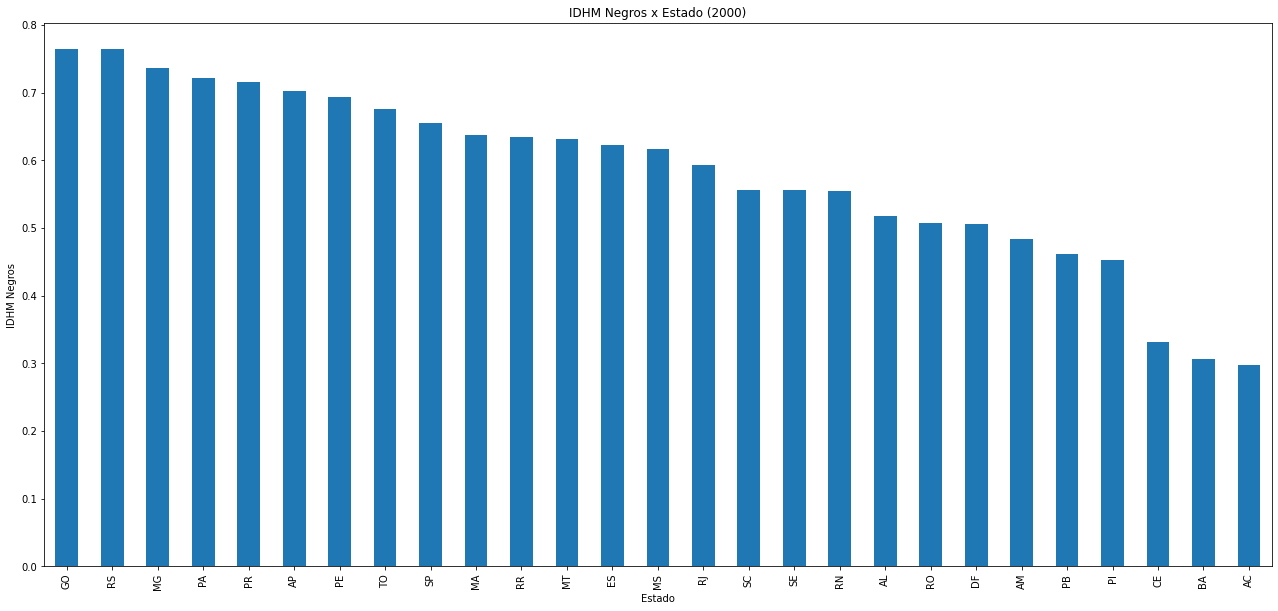

In [ ]:
#Plotagem do gráfico de barras que representa o IDHM dos negros por estado no ano de 2000
negros2000["idhm_negros"].sort_values(ascending=False).plot.bar(figsize=(22,10),xlabel='Estado',ylabel='IDHM Negros',title="IDHM Negros x Estado (2000)")


In [ ]:
#Agrupamento do idhm dos negros por Estado no ano de 2010
negros2010 = pd2010.groupby("uf").mean("idhm_negros")

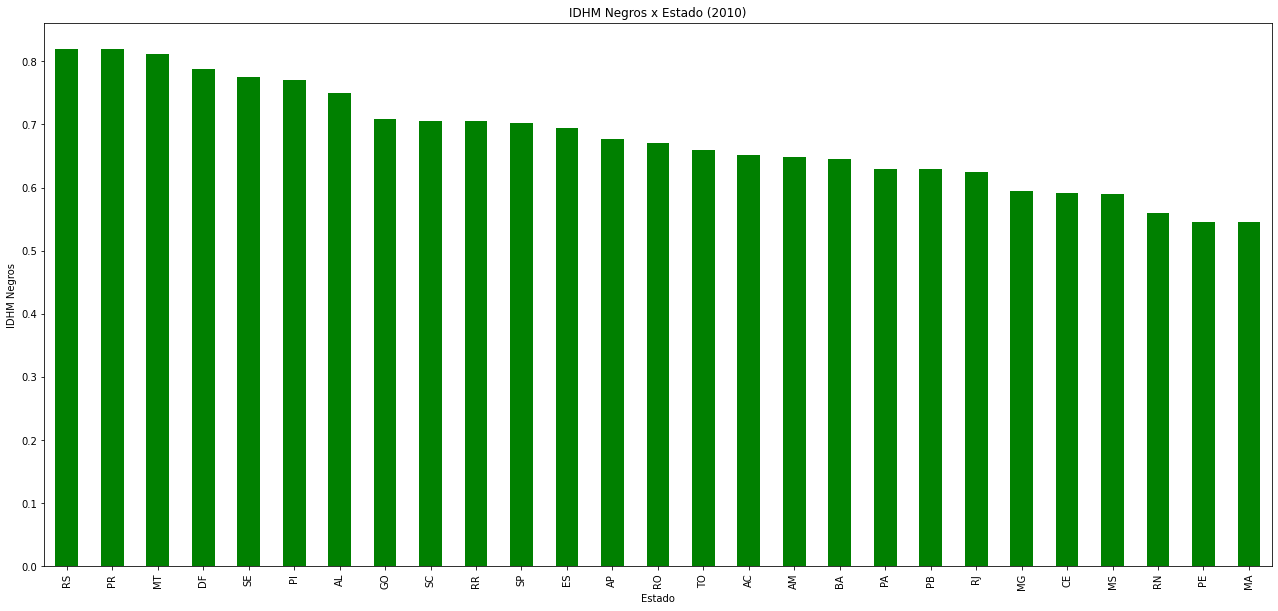

In [ ]:
#Plotagem do gráfico de barras que representa o IDHM dos negros por estado no ano de 2010
negros2010["idhm_negros"].sort_values(ascending=False).plot.bar(figsize=(22,10),xlabel='Estado',ylabel='IDHM Negros',title="IDHM Negros x Estado (2010)",color='g')

##Visualização gráfica do idhm dos brancos entre 2000-2010

In [ ]:
#Agrupamento do idhm dos brancos por Estado no ano de 2000
brancos2000 = pd2000.groupby("uf").mean("idhm_brancos")

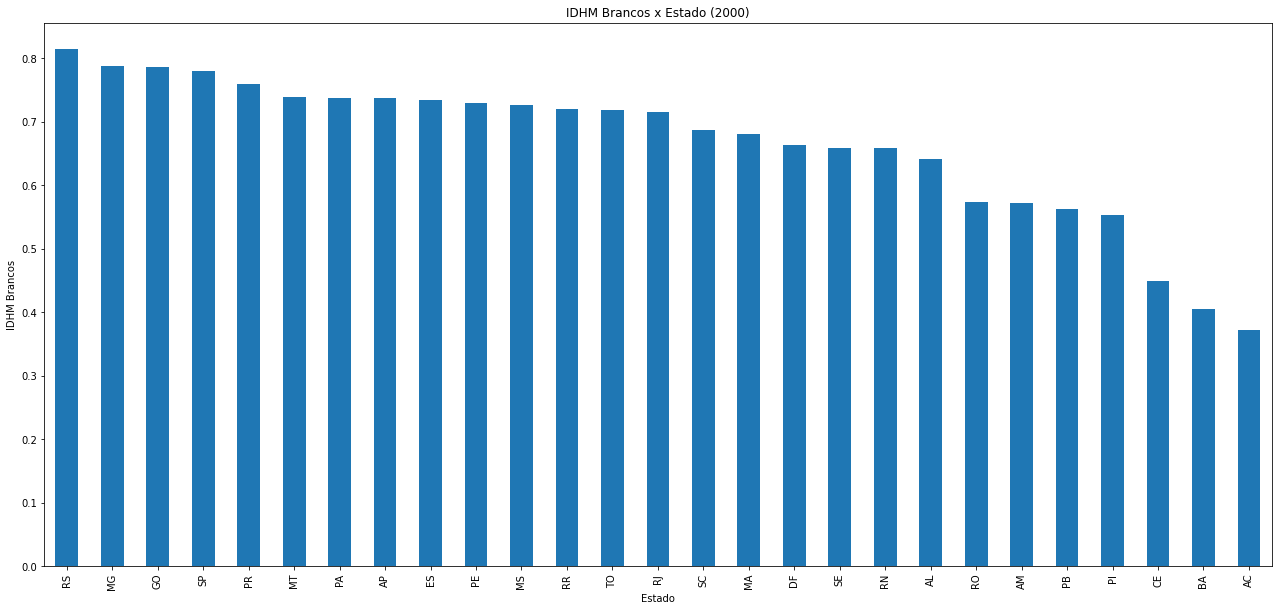

In [ ]:
#Plotagem do gráfico de barras que representa o IDHM dos brancos por estado no ano de 2000
brancos2000["idhm_brancos"].sort_values(ascending=False).plot.bar(figsize=(22,10),xlabel='Estado',ylabel='IDHM Brancos',title="IDHM Brancos x Estado (2000)")

In [ ]:
#Agrupamento do idhm dos brancos por Estado no ano de 2010
brancos2010 = pd2010.groupby("uf").mean("idhm_brancos")

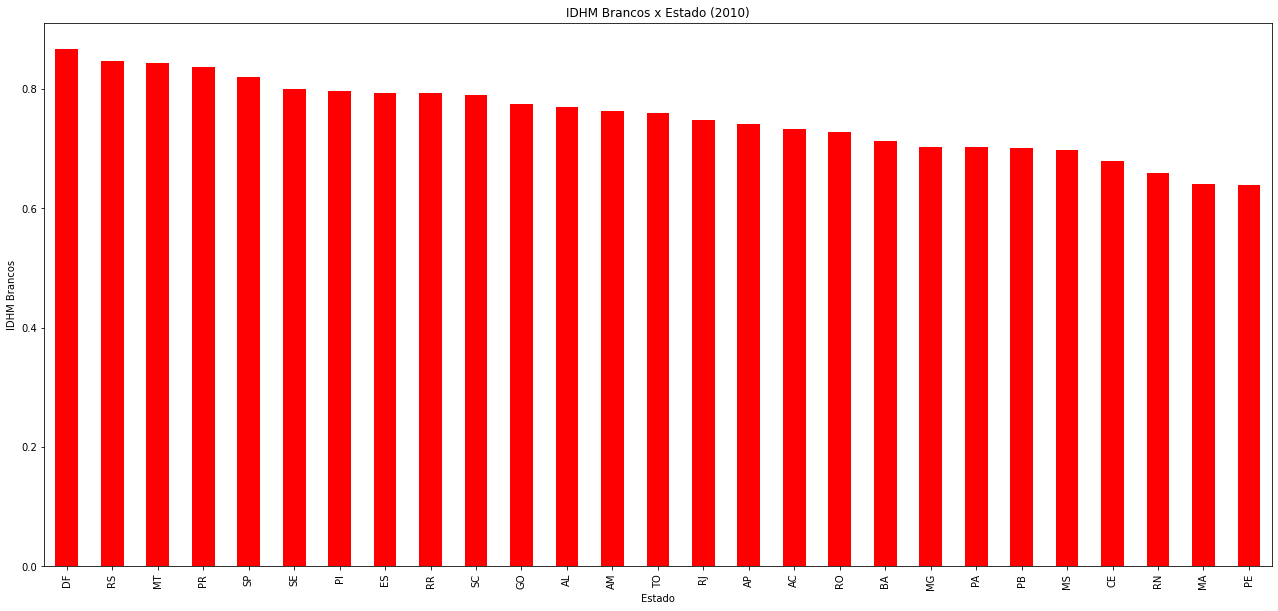

In [ ]:
#Plotagem do gráfico de barras que representa o IDHM dos brancos por estado no ano de 2010
brancos2010["idhm_brancos"].sort_values(ascending=False).plot.bar(figsize=(22,10),\
xlabel='Estado',ylabel='IDHM Brancos',title="IDHM Brancos x Estado (2010)",color='r')

# SPARKSQL

In [ ]:
dfs=dfregiao

In [ ]:
#criando a tabela temporária para dfregiao
dfregiao.createOrReplaceTempView('dfconsulta')

In [ ]:
#Quais são as 5 cidades de São Paulo com maior IDHM?

spark.sql("SELECT * FROM  dfconsulta WHERE idhm >= 0.8 AND ano == 2010 AND uf = 'SP' ORDER BY idhm").show(5)

# As 5 cidades com maior IDHM do estado de São Paulo em 2010, foram: Ribeirão Preto, Botucatu, Taubaté, Pirassununga, Bauru.

+----+---+--------------+-----------+---------------+------------------+------------------+------------------+----------------+----------+-------------+-----------------+-----+-----------------+---------+---------+-------+-------+
| ano| uf|     municipio|renda_media|tx_ativ_10_anos|tx_ativ_10-14_anos|tx_desocup_10_anos|tx_desocup_adultos|idhm_longevidade|idhm_renda|idhm_educacao|escol_fund_adulta| idhm|perc_ocup_18_anos|pop_rural|pop_total|pop_urb| regiao|
+----+---+--------------+-----------+---------------+------------------+------------------+------------------+----------------+----------+-------------+-----------------+-----+-----------------+---------+---------+-------+-------+
|2010| SP|RIBEIRÃO PRETO|    1314.04|          64.84|              6.39|              5.47|              4.72|           0.844|      0.82|        0.739|            0.683|  0.8|             59.2|     1716|   604682| 602966|SUDESTE|
|2010| SP|      BOTUCATU|     1089.1|          58.95|              5.01|    

In [ ]:
#criando a tabela temporária para dffspark
dffspark.createOrReplaceTempView('dfconsulta2')
spark.sql("SELECT * FROM dfconsulta2").show(truncate=False)

+--------------------+---------------------------+----------------------+------------+-----------------+--------------------------+-----------------------+-----------------------------+------------------------+----------------------------------+--------------+------------------------------------------------+-----------------------+-----------+--------------------------+------------------------------+--------------------------------------------------------------------------------+----------------------------------------------------------------+---------------------------+--------------------------+-------------------+------------------------------+---------------------------+--------------------+---------------------------------+----------------------------+-------------------------------------------------+------------------------+--------------+--------------------+---------------------+---------------------+------------------+------------------+-------------------+--------------------

In [ ]:
# A taxa de fertilidade de nascimento de filhos por mulher vem aumentando ou diminuindo nas ultimas duas décadas?

spark.sql('SELECT tx_fertili_nasc_por_mulher , ano FROM dfconsulta2').show(50)

# A taxa de fertilidade veio diminuindo ao longo dos anos.

In [ ]:
# O uso de método anticoncepcional entre adolescentes do sexo feminino entre 15 e 19 anos tem 
# relação com os números da taxa de fertilidade de adolescentes de 15 a 19 anos ?

spark.sql('SELECT uso_metodo_anticon_15a19, tx_fertili_adolesc_por1000_de15a19 ,ano FROM dfconsulta2  WHERE ano = 1991 or ano = 1996 or ano = 2006 or ano = 2013').show(50)

# Verificamos que a taxa de fertilidade diminuiu nas últimas duas décadas, embora que não de maneira constante.
# O uso de anticoncepcionais aumentou nesse mesmo período, porém de 2006 a 2013 houve uma estabilidade nessa taxa.

+------------------------+----------------------------------+----+
|uso_metodo_anticon_15a19|tx_fertili_adolesc_por1000_de15a19| ano|
+------------------------+----------------------------------+----+
|                    59.2|                           83.3338|1991|
|                    76.7|                            84.155|1996|
|                    80.3|                             73.09|2006|
|                    80.2|                           63.0646|2013|
+------------------------+----------------------------------+----+



# LOAD

## Arquivos tratados do Pyspark para o DATALAKE

In [ ]:
# Enviando os arquivos tratados do PySpark para o DATALAKE



(dfregiao.write.format("csv").option("header", "true")
                        .option("inferschema", "true")
                        .option("delimiter", ",")                        
                        .save('gs://bucket-estilo-vida/dados_tratados/Pyspark/dfregiao')
                        )

In [ ]:
(dfs2estado.write.format("csv").option("header", "true")
                        .option("inferschema", "true")
                        .option("delimiter", ",")                        
                        .save('gs://bucket-estilo-vida/dados_tratados/Pyspark/dfs2estado')
                        )

In [ ]:
(dffspark.write.format("csv").option("header", "true")
                        .option("inferschema", "true")
                        .option("delimiter", ",")                        
                        .save('gs://bucket-estilo-vida/dados_tratados/Pyspark/dffspark')
                        )

## Enviando os arquivos tratados para o MongoDB

In [ ]:

#Transformando do Pyspark para o pandas
df_regiao = dfregiao.toPandas()

#Criando o Banco e a Coleção dados_brutos
db = client['Projetofinal-tratado']
colecao = db.df_regiao

#Transformando o dataframe para dicionario e inserindo na coleção desejada.
df_regiao_dici = df_regiao.to_dict('records')
#colecao.insert_many(df_regiao_dici)



In [ ]:

#Transformando do Pyspark para o pandas
dfs2estado_pandas = dfs2estado.toPandas()

#Criando o Banco e a Coleção dados_brutos
db = client['Projetofinal-tratado']
colecao = db.dfs2estado_pandas

#Transformando o dataframe para dicionario e inserindo na coleção desejada.
dfs2estado_pandas_dici = dfs2estado_pandas.to_dict('records')
#colecao.insert_many(dfs2estado_pandas_dici)

In [ ]:

#Transformando do Pyspark para o pandas
dff_spark = dffspark.toPandas()

#Criando o Banco e a Coleção dados_brutos
db = client['Projetofinal-tratado']
colecao = db.dff_spark

#Transformando o dataframe para dicionario e inserindo na coleção desejada.
dff_spark_dici = dff_spark.to_dict('records')
#colecao.insert_many(dff_spark_dici)